<a href="https://colab.research.google.com/github/Tonge-Shim/1/blob/master/1970052_%EC%8B%AC%EC%B1%84%EC%9D%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# import libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets
import pandas as pd
import io

# generating training dataset


In [2]:
# upload file with dictionary format, with key as name of uploaded file 
# and corresponding values as the contens of the file 
from google.colab import files
uploaded_train = files.upload()
uploaded_test = files.upload()


Saving Train_Data.txt to Train_Data (1).txt


Saving Test_Data.txt to Test_Data (1).txt


In [5]:
# use panda and io pachage to load txt. 
df_train = pd.read_csv(io.StringIO(uploaded_train['Train_Data.txt'].decode("utf-8")), 
                       sep=',', names=['ID', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'class'], header=None)
#print(df_train)
#replace missing value ? with 0


selecting features

In [6]:
X=df_train[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']].replace({'?':0})
y = df_train['class'].replace({2:0, 4:1})


#1. selectkbest

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(9,'Score'))  #print 10 best features

  Specs        Score
5    x6  1221.403569
1    x2   863.356466
2    x3   837.828128
7    x8   745.776302
3    x4   606.855977
0    x1   527.381572
6    x7   380.346755
4    x5   355.923564
8    x9   186.546032


#2. feature importance

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

[0.14586791 0.15963551 0.1514542  0.05433612 0.05337252 0.25907148
 0.06638362 0.09845075 0.01142789]


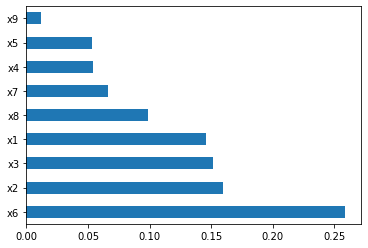

In [ ]:
modelfi = ExtraTreesClassifier( )
modelfi.fit(X,y)
print(modelfi.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(modelfi.feature_importances_, index=X.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

consequently, it seems that x6, x2, x3 are the most important features.

In [7]:
x_train = torch.Tensor(df_train[['x2', 'x3','x6',  'x1']].replace({'?':0}).values.astype(np.uint8))
# class 2 for benign, 4 for malignant -> 0 for bengn, 1 for malignant
y_train = torch.Tensor(df_train['class'].replace({2:0, 4:1}).values.astype(np.uint8))
#print(y_train)

# Define model class
z = w1*x1 + w2*x2 + w3*x3 ....  + w6*x6 + b  -> <br>
y = a = sigma(z) -> <br>
L(y_hat = a, y)


In [41]:
class LogisticRegression(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x): 
    pred = torch.sigmoid(self.linear(x))
    return pred   #probability (not direct value)

  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0


# instantiate model class
torch.manual_seed(1)
model = LogisticRegression(x_train.shape[1], 1) # [500, 6]
print(list(model.parameters()))



[Parameter containing:
tensor([[ 0.2576, -0.2207, -0.0969,  0.2347]], requires_grad=True), Parameter containing:
tensor([-0.4707], requires_grad=True)]


# function to get model parameters (w1, w2, b)

In [9]:
[w, b] = model.parameters()#계수, 절편
#print(w) 
w1, w2, w3, w4= w.view(x_train.shape[1])

def get_params():
  return (w1.item(), w2.item(), b[0].item())

# training the model 

In [42]:
# instantitate optimizer 
criterion = nn.BCELoss()  # = nn.CrossEntropyLoss() # for LR with more than 2 classes
optimizer = torch.optim.SGD(model.parameters(), lr=0.02, momentum=0.9 )#여기서 l2파라미터 조정 가능/weight-decay


# training the model 
epochs = 300
losses = []

for i in range(epochs):
  y_pred = model.forward(x_train)

  # calculate loss 
  loss = criterion(y_pred, y_train)
  #L1 parameter
  [w,b] = model.parameters()
  w1, w2, w3, w4= w.view(x_train.shape[1])
  lbd=3
  L1_reg = lbd * (abs(w1) + abs(w2) + abs(w3)+abs(w4))/(2*len(x_train)) 
  loss = loss + L1_reg

  print("epoch: ", i, "loss: ", loss.item())
  losses.append(loss.item())

  optimizer.zero_grad() # clear gradients wrt parameters
  loss.backward()
  optimizer.step()

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([500])) that is different to the input size (torch.Size([500, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


epoch:  0 loss:  0.6495049595832825
epoch:  1 loss:  0.6352598667144775
epoch:  2 loss:  0.6162009835243225
epoch:  3 loss:  0.5978875160217285
epoch:  4 loss:  0.5788801908493042
epoch:  5 loss:  0.556433916091919
epoch:  6 loss:  0.5304853916168213
epoch:  7 loss:  0.504489541053772
epoch:  8 loss:  0.4826498031616211
epoch:  9 loss:  0.4666847884654999
epoch:  10 loss:  0.45451751351356506
epoch:  11 loss:  0.44296029210090637
epoch:  12 loss:  0.43137961626052856
epoch:  13 loss:  0.42120909690856934
epoch:  14 loss:  0.41360214352607727
epoch:  15 loss:  0.4083595275878906
epoch:  16 loss:  0.40446382761001587
epoch:  17 loss:  0.40093082189559937
epoch:  18 loss:  0.3972474932670593
epoch:  19 loss:  0.3933872580528259
epoch:  20 loss:  0.38962024450302124
epoch:  21 loss:  0.38612625002861023
epoch:  22 loss:  0.38296762108802795
epoch:  23 loss:  0.37999966740608215
epoch:  24 loss:  0.37697574496269226
epoch:  25 loss:  0.37370190024375916
epoch:  26 loss:  0.37013697624206543

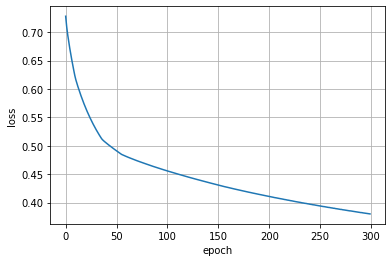

In [29]:
# log loss
plt.plot(range(epochs), losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()


# model evalation with new datasets the model has never seen before

In [43]:
# use panda and io pachage to load txt. 
df_test = pd.read_csv(io.StringIO(uploaded_test['Test_Data.txt'].decode("utf-8")), 
                       sep=',', names=['ID', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'class'], header=None)
#print(df_test)
#replace missing value ? with 0
x_test = torch.Tensor(df_test[[ 'x2', 'x3', 'x6', 'x1']].replace({'?':0}).values.astype(np.uint8))
# class 2 for benign, 4 for malignant -> 0 for bengn, 1 for malignant
y_test = torch.Tensor(df_test['class'].replace({2:0, 4:1}).values.astype(np.uint8))
#print(y_test)

In [44]:
#model test w/ all test datasets
no_correct = 0
for i in range(len(x_train)):
  if model.predict(x_train[i]) == y_train[i]:
    no_correct += 1


accuracy = no_correct/len(x_train)*100
print("Predcition accuracy_train= {}%".format(accuracy))

no_correct_test=0
for i in range(len(x_test)):
  if model.predict(x_test[i]) == y_test[i]:
    no_correct_test += 1

accuracy = no_correct_test/len(x_test)*100

print("Predcition accuracy_test= {}%".format(accuracy))

Predcition accuracy_train= 94.8%
Predcition accuracy_test= 99.49748743718592%
